In [4]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt


In [5]:
# Define the API endpoint for NASA data
api_endpoint = "https://data.nasa.gov/resource/gquh-watm.json"

In [6]:
# Send a GET request to the API endpoint
response = requests.get(api_endpoint)

# Parse the response data (assuming JSON)
data = response.json()

print(data)  # Print the response data

[{'center': 'NASA Kennedy Space Center', 'status': 'Application', 'case_number': 'KSC-12871', 'patent_number': '0', 'application_sn': '13/033,085', 'title': 'Polyimide Wire Insulation Repair System'}, {'center': 'NASA Ames Research Center', 'status': 'Issued', 'case_number': 'ARC-14048-1', 'patent_number': '5694939', 'application_sn': '08/543,093', 'title': 'Autogenic-Feedback Training Exercise Method & System', 'patent_expiration_date': '2015-10-03T00:00:00.000'}, {'center': 'NASA Ames Research Center', 'status': 'Issued', 'case_number': 'ARC-14231-1', 'patent_number': '6109270', 'application_sn': '09/017,519', 'title': 'Multimodality Instrument For Tissue Characterization', 'patent_expiration_date': '2017-02-04T00:00:00.000'}, {'center': 'NASA Ames Research Center', 'status': 'Issued', 'case_number': 'ARC-14231-2DIV', 'patent_number': '6976013', 'application_sn': '10/874,003', 'title': 'Metrics For Body Sensing System', 'patent_expiration_date': '2024-06-16T00:00:00.000'}, {'center':

In [17]:
#creating a DataFrame
df=pd.DataFrame(data)

In [18]:
df

,center,status,case_number,patent_number,application_sn,title,patent_expiration_date
0,NASA Kennedy Space Center,Application,KSC-12871,0,"13/033,085",Polyimide Wire Insulation Repair System,NaN
1,NASA Ames Research Center,Issued,ARC-14048-1,5694939,"08/543,093",Autogenic-Feedback Training Exercise Method & ...,2015-10-03T00:00:00.000
2,NASA Ames Research Center,Issued,ARC-14231-1,6109270,"09/017,519",Multimodality Instrument For Tissue Characteri...,2017-02-04T00:00:00.000
3,NASA Ames Research Center,Issued,ARC-14231-2DIV,6976013,"10/874,003",Metrics For Body Sensing System,2024-06-16T00:00:00.000
4,NASA Ames Research Center,Issued,ARC-14231-3,6718196,"09/652,299",Multimodality Instrument For Tissue Characteri...,2017-02-04T00:00:00.000
...,...,...,...,...,...,...,...
995,NASA Glenn Research Center,Application,LEW-18923-1,NaN,"13/963,060",New Power Source For Deep Space Missions- Util...,2033-08-09T00:00:00.000
996,NASA Glenn Research Center,Application,LEW-18928-1,NaN,NaN,Pt-Ti-Si Simultaneous Ohmic Contacts to N- and...,NaN
997,NASA Glenn Research Center,Application,LEW-18934-1,NaN,"13/900,642",Conditionally Active Min-Max Limit Regulators,2033-05-23T00:00:00.000
998,NASA Glenn Research Center,Application,LEW-18939-1,NaN,"13/916,797","Magnetostrictive Alternator - Low cost, No mov...",2033-06-13T00:00:00.000


In [19]:
#Columns in the DataFrame
df.columns

Index(['center', 'status', 'case_number', 'patent_number', 'application_sn',
       'title', 'patent_expiration_date'],
      dtype='object')

In [ ]:
df.head(10)

In [20]:

#Replacing NaN values in patent_number column of dataFRame to 'pending'

df['patent_number']=df['patent_number'].replace('NaN','pending')

In [122]:
df['patent_expiration_date'].fillna(pd.Timestamp.now())


0      2024-07-31
1      2015-10-03
2      2017-02-04
3      2024-06-16
4      2017-02-04
          ...    
995    2033-08-09
996    2024-07-31
997    2033-05-23
998    2033-06-13
999    2033-02-20
Name: patent_expiration_date, Length: 1000, dtype: object

In [22]:
df['patent_expiration_date']

0      2024-07-31 18:16:24.409830
1         2015-10-03T00:00:00.000
2         2017-02-04T00:00:00.000
3         2024-06-16T00:00:00.000
4         2017-02-04T00:00:00.000
                  ...            
995       2033-08-09T00:00:00.000
996    2024-07-31 18:16:24.409830
997       2033-05-23T00:00:00.000
998       2033-06-13T00:00:00.000
999       2033-02-20T00:00:00.000
Name: patent_expiration_date, Length: 1000, dtype: object

In [23]:
#Converting patent_expiration_date to datetime format
df['patent_expiration_date']=pd.to_datetime(df['patent_expiration_date']).dt.date 


In [24]:
df['patent_expiration_date']

0      2024-07-31
1      2015-10-03
2      2017-02-04
3      2024-06-16
4      2017-02-04
          ...    
995    2033-08-09
996    2024-07-31
997    2033-05-23
998    2033-06-13
999    2033-02-20
Name: patent_expiration_date, Length: 1000, dtype: object

In [43]:
df['patent_number']

0            0
1      5694939
2      6109270
3      6976013
4      6718196
        ...   
995        NaN
996        NaN
997        NaN
998        NaN
999        NaN
Name: patent_number, Length: 1000, dtype: object

In [25]:
df['patent_number'] = df['patent_number'].replace(np.NaN,'pending')

In [26]:
df['patent_number']

0            0
1      5694939
2      6109270
3      6976013
4      6718196
        ...   
995    pending
996    pending
997    pending
998    pending
999    pending
Name: patent_number, Length: 1000, dtype: object

In [28]:
df


,center,status,case_number,patent_number,application_sn,title,patent_expiration_date
0,NASA Kennedy Space Center,Application,KSC-12871,0,"13/033,085",Polyimide Wire Insulation Repair System,2024-07-31
1,NASA Ames Research Center,Issued,ARC-14048-1,5694939,"08/543,093",Autogenic-Feedback Training Exercise Method & ...,2015-10-03
2,NASA Ames Research Center,Issued,ARC-14231-1,6109270,"09/017,519",Multimodality Instrument For Tissue Characteri...,2017-02-04
3,NASA Ames Research Center,Issued,ARC-14231-2DIV,6976013,"10/874,003",Metrics For Body Sensing System,2024-06-16
4,NASA Ames Research Center,Issued,ARC-14231-3,6718196,"09/652,299",Multimodality Instrument For Tissue Characteri...,2017-02-04
...,...,...,...,...,...,...,...
995,NASA Glenn Research Center,Application,LEW-18923-1,pending,"13/963,060",New Power Source For Deep Space Missions- Util...,2033-08-09
996,NASA Glenn Research Center,Application,LEW-18928-1,pending,NaN,Pt-Ti-Si Simultaneous Ohmic Contacts to N- and...,2024-07-31
997,NASA Glenn Research Center,Application,LEW-18934-1,pending,"13/900,642",Conditionally Active Min-Max Limit Regulators,2033-05-23
998,NASA Glenn Research Center,Application,LEW-18939-1,pending,"13/916,797","Magnetostrictive Alternator - Low cost, No mov...",2033-06-13


In [29]:
#finding Unique values in DataFrame using column application_sn
unique_applications = df['application_sn'].nunique()

In [29]:
unique_applications

994

In [30]:
# Dropping duplicate rows 
df1 = df.drop_duplicates(subset='application_sn', keep='first')

In [96]:
df1=df1.copy()
# Adding a new Column 'year' to the DataFrame from column 'patent_expiration_date'
df1['year']=pd.to_datetime(df1['patent_expiration_date']).dt.year 

In [97]:
df1
# Analyze the data: count the number of patents by year

patents_count_by_year = df1['year'].value_counts().sort_index()
print(patents_count_by_year)

year
1930      4
1931      6
1932     12
1933     14
1934      2
2015      8
2016      6
2017     13
2018      6
2019     17
2020     17
2021     19
2022     29
2023     26
2024    319
2025     54
2026     67
2027     50
2028     55
2029     69
2030     55
2031     46
2032     44
2033     53
2034      4
Name: count, dtype: int64


In [34]:
# Identifying Patents with status of Issued and year <2025
patent_granted  = df1[(df1['status']=='Issued') & (df1['year']< 2025)]
patent_granted

,center,status,case_number,patent_number,application_sn,title,patent_expiration_date,year
1,NASA Ames Research Center,Issued,ARC-14048-1,5694939,"08/543,093",Autogenic-Feedback Training Exercise Method & ...,2015-10-03,2015
2,NASA Ames Research Center,Issued,ARC-14231-1,6109270,"09/017,519",Multimodality Instrument For Tissue Characteri...,2017-02-04,2017
3,NASA Ames Research Center,Issued,ARC-14231-2DIV,6976013,"10/874,003",Metrics For Body Sensing System,2024-06-16,2024
4,NASA Ames Research Center,Issued,ARC-14231-3,6718196,"09/652,299",Multimodality Instrument For Tissue Characteri...,2017-02-04,2017
5,NASA Ames Research Center,Issued,ARC-14275-1,6445390,"09/226,673",Automated Triangle Geometry Processing For Sur...,2018-12-24,2018
...,...,...,...,...,...,...,...,...
825,NASA Glenn Research Center,Issued,LEW-17618-1,7015304,"10/897,279",High Tg Polyimides For Resin Transfer Molding ...,2024-07-23,2024
836,NASA Glenn Research Center,Issued,LEW-17672-1,7261783,"10/946,286",Low Density High Creep Resistant Single Crysta...,2024-09-22,2024
839,NASA Glenn Research Center,Issued,LEW-17704-1,7250723,"11/16,735",Cathode Luminescence Light Source For Broad Ba...,2024-12-21,2024
857,NASA Glenn Research Center,Issued,LEW-17951-1,8545786,"10/621,752",Manufacture Of Porous Net-Shaped Materials Com...,2023-07-16,2023


In [87]:
#counting the no. of patents by year 
year_count = patent_granted['year'].value_counts().sort_index(ascending=False)
year_count

year
2024    107
2023     26
2022     29
2021     19
2020     17
2019     17
2018      6
2017     13
2016      6
2015      8
1932      2
1931      6
1930      3
Name: count, dtype: int64

In [91]:
year_count.dtypes
total_patents = year_count.sum()
total_patents
percentage_year = round((year_count/ total_patents)*100,2)
percentage_year

year
2024    41.31
2023    10.04
2022    11.20
2021     7.34
2020     6.56
2019     6.56
2018     2.32
2017     5.02
2016     2.32
2015     3.09
1932     0.77
1931     2.32
1930     1.16
Name: count, dtype: float64

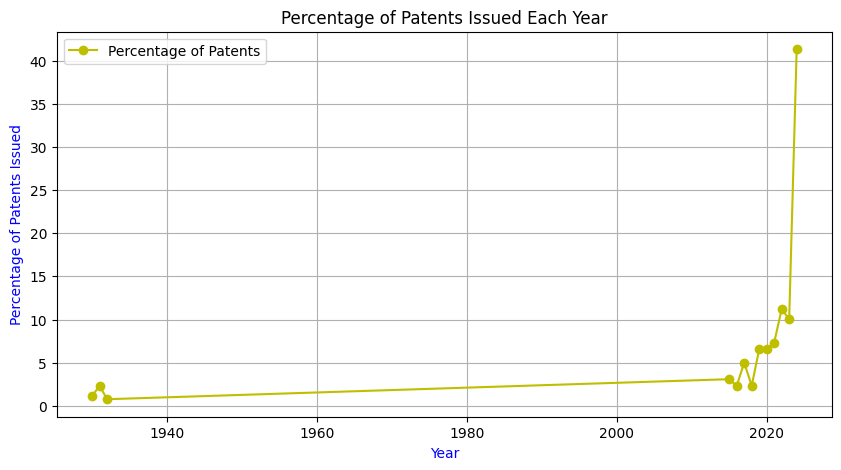

In [92]:
#Plotting line graph between year and Percentage of Patents Issued

plt.figure(figsize=(10, 5))

plt.plot(year_count.index, percentage_year, marker='o', linestyle ='-',label='Percentage of Patents',color='y')
plt.legend(loc='upper left')
plt.xlabel('Year',color='b')
plt.ylabel('Percentage of Patents Issued',color='b')
plt.title('Percentage of Patents Issued Each Year')

plt.grid(True)
plt.show()
#Analysis:There has been a sharp increase in the number of patents issued since 2019 to 2024

center
NASA Ames Research Center                138
NASA Armstrong Flight Research Center     21
NASA Glenn Research Center               207
NASA Goddard Space Flight Center         191
NASA Headquarters                          1
NASA Johnson Space Center                  1
NASA Kennedy Space Center                 87
NASA Langley Research Center             349
Name: count, dtype: int64


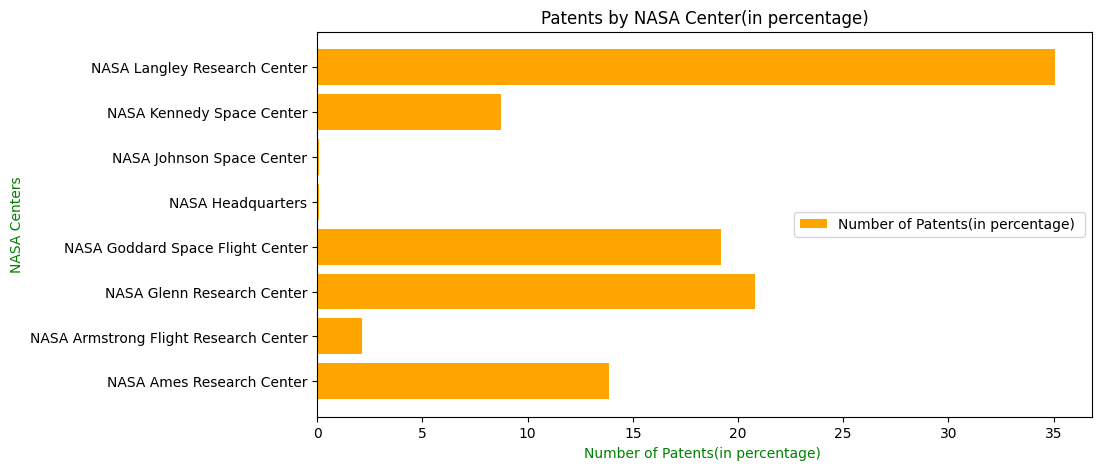

In [104]:
#To identify which centers have the most patents
# PLotting a horizontal bar graph for Patents by NASA Center(Percentage)
top_inventors = df1['center'].value_counts().sort_index()
print(top_inventors)
plt.figure(figsize=(10, 5))
plt.barh(top_inventors.index, (top_inventors.values / top_inventors.sum()) * 100,label="Number of Patents(in percentage) ",color='orange')
plt.legend(loc='center right')
plt.title("Patents by NASA Center(in percentage)")
plt.xlabel("Number of Patents(in percentage) ",color='g')

plt.ylabel("NASA Centers",color='g')
plt.show()
#NASA Langley Research center has been the top inventor and has contributed to 35% of total patents

In [73]:
#Patent status analysis
patent_status_analysis=df1['status'].value_counts()

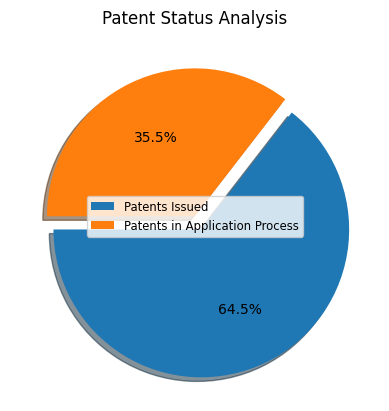

In [118]:
patent_status_analysis
# 353 Patents are yet to be issued and are in process and 642 are the total issued patents
exp = (0.1, 0)
plt.pie(patent_status_analysis, autopct='%1.1f%%',startangle=180,explode=exp,shadow=True)
plt.legend(labels=['Patents Issued', 'Patents in Application Process'], loc='center', fontsize='small')
plt.title("Patent Status Analysis")

plt.show()

In [119]:
#Percentage of patents yet to be issued is 35.5%